In [137]:
words = open('names.txt', 'r').read().splitlines()

In [138]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [139]:
len(words)

32033

In [140]:
min(len(w) for w in words)

2

In [141]:
max(len(w) for w in words)

15

In [142]:
s="pi"
t='ayu'
for i,j in zip(s,t):   #zip takes two iterator and pairs them up and then
                    # create a tuple over their consecutive entries
    print(i,j)

p a
i y


In [143]:
for i in words:
    chs = ['<S>'] + list(i) + ['<E>']
    print(chs)
    break

['<S>', 'e', 'm', 'm', 'a', '<E>']


In a Bigram language model we take one character into consideration and we have to predict the next character

In [144]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):   
  # 
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1   # If bigram is not there then 0

In [145]:
sorted(b.items(), key = lambda kv: -kv[1])  # sort by the values in descending order

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [146]:
import torch

In [147]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [148]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [149]:
for w in words:
    chs=['.']+list(w)+['.']
    print(chs)
    for i,j in zip(chs[:],chs[1:]):
        print(i,j)
    break

['.', 'e', 'm', 'm', 'a', '.']
. e
e m
m m
m a
a .


In [150]:
chs[:]

['.', 'e', 'm', 'm', 'a', '.']

In [151]:
for w in words:
  chs = ['.'] + list(w) + ['.']   # In each word we have a start . and end . so total 27 characters we have out there
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

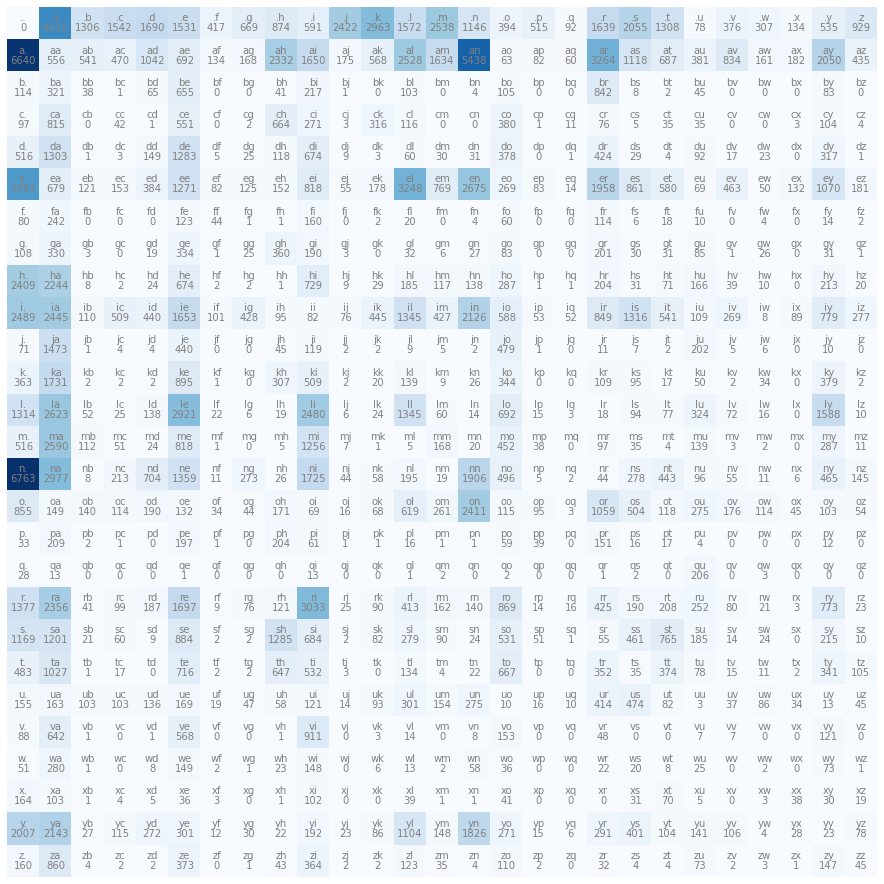

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [153]:

N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [154]:
N.shape


torch.Size([27, 27])

In [155]:
N.sum(1,keepdim=True).shape  # If keepdim is True, the output tensor is of the same size as input 
# except in the dimension(s) dim where it is of size 1.
# In this we are doing row wise so 27*1 else if column wise(0) then then 27*1

torch.Size([27, 1])

In [156]:
p = N[0].float()       # for converting it into porbabilities chaning it into float
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [157]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [158]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [159]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [160]:
p.shape

torch.Size([3])

In [161]:
N.sum(dim=0,keepdim=True).shape

torch.Size([1, 27])

In [162]:
# 27, 27
# 27,  1
# to divide it does the broadcasting so we have that 27*1 turns 27*27(copies column vector 27 times)
# and element wise division so 27*27 output 

In [163]:
# p.sum(1).shape  # if we don't take keepdim=True then we 
# 27 *27
# 27
# so first we match on going to the right
# 27 27
#    27
# then its convberted to
# 27 27
# 1 27

In [164]:
# Here we have problem because that row vector is broadcasted and it will be wrong
# instead of normalizing rows we are normalizing column

In [165]:
P = (N+1).float()    # +1 is done for smoothing and the more the value you add the more it goes towards uniform distribution
P /= P.sum(1, keepdims=True)

In [166]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [167]:
# GOAL: maximize likelihood(product of all the probabilities since it is very tiny number so log and then the sum) of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic) 
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [168]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [169]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)   # detect the dtype 
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [170]:
xs

tensor([ 0,  5, 13, 13,  1])

In [171]:
ys

tensor([ 5, 13, 13,  1,  0])

In [172]:
# you can give an integer as a input to a neural network
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()    # we want the float number here because we want in NN floating point numbers
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [173]:
xenc.shape

torch.Size([5, 27])

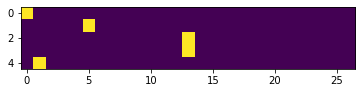

In [174]:
plt.imshow(xenc)

In [175]:
xenc.shape

torch.Size([5, 27])

In [176]:
W=torch.randn((27,1))

In [177]:
logits = xenc @ W # log-counts 
counts = logits.exp() # equivalent N  Do the softmax operation
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [178]:
probs[0]

tensor([1.])

In [179]:
probs[0].shape

torch.Size([1])

In [180]:
probs[0].sum()

tensor(1.)

In [181]:
# (5, 27) @ (27, 27) -> (5, 27)

In [182]:
# SUMMARY ------------------------------>>>>

In [183]:
xs

tensor([ 0,  5, 13, 13,  1])

In [184]:
ys

tensor([ 5, 13, 13,  1,  0])

In [185]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [136]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
print(xenc.shape)
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

torch.Size([5, 27])


In [159]:
probs.shape

torch.Size([5, 27])

In [160]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [161]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [162]:
xs


tensor([ 0,  5, 13, 13,  1])

In [163]:
ys

tensor([ 5, 13, 13,  1,  0])

In [164]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [165]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
print(probs.shape)
loss = -probs[torch.arange(5), ys].log().mean()

torch.Size([5, 27])


In [166]:
print(loss.item())

3.7693049907684326


In [167]:
# backward pass
W.grad = None # set to zero the gradient one more way
loss.backward()

In [168]:
W.data += -0.1 * W.grad

In [169]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [170]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)



number of examples:  228146


In [171]:

# gradient descent
for k in range(10):
   # if w are all zero then logits is 0 and counts will be all 1 then we have a uniform distribution
    # so we can also think that if we add a 0.01*(W**2).mean() then we can control how much uniform distr we want 
    # more the lambda is the more the more uniform dist
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.768618583679199
3.3788068294525146
3.161090850830078
3.0271859169006348
2.9344842433929443
2.867231607437134
2.8166542053222656
2.777146577835083
2.745253801345825
2.7188305854797363


In [174]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:

   
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()

    logits = xenc @ W # predict log-counts  (since the input is one hot so multiplication is the 5th row of W AND IT IS SAME AS N BUT IT IS THE LOG ONE )
    
    counts = logits.exp() # counts, equivalent to N(count based model)
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

juwjde.
janaqydjufhfbywe.
nn.
ksh.
ritoleras.
